In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/images.jpg

--2022-02-20 17:12:56--  https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/images.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/images.jpg [following]
--2022-02-20 17:12:56--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/images.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3942 (3.8K) [image/jpeg]
Saving to: ‘images.jpg.1’

images.jpg.1        100%[===================>]   3.85K  --.-KB/s    in 0s      

2022-02-20 17:12:57 (63.7 MB/s) - ‘images.jpg.1’ saved [3942/3942]



In [ ]:
img=plt.imread("images.jpg")

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

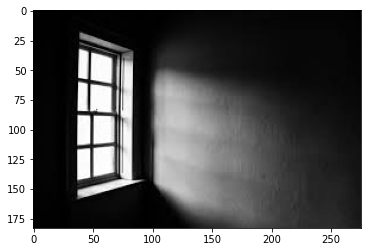

In [ ]:
plt.imshow(gray,cmap="gray")

# 1. Image thresholding

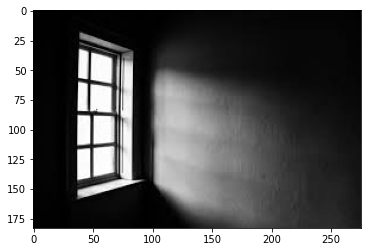

In [ ]:
plt.imshow(gray,cmap="gray")

In [ ]:
gray

array([[ 1,  1,  1, ...,  2,  2,  2],
       [ 1,  1,  1, ...,  2,  2,  2],
       [ 1,  1,  1, ...,  2,  2,  2],
       ...,
       [ 1,  1,  1, ..., 27, 26, 26],
       [ 1,  1,  1, ..., 27, 27, 27],
       [ 1,  1,  1, ..., 28, 27, 27]], dtype=uint8)

In [ ]:
ret,thresh1 = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)

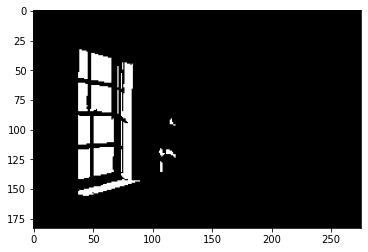

In [ ]:
plt.imshow(thresh1,cmap="gray")

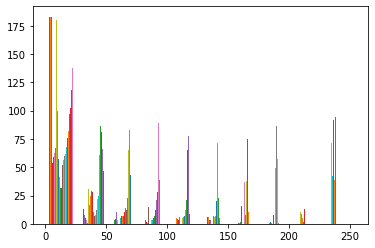

In [ ]:
plt.hist(gray)
plt.show()

In [ ]:
img_adpative_thresholding=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,3)

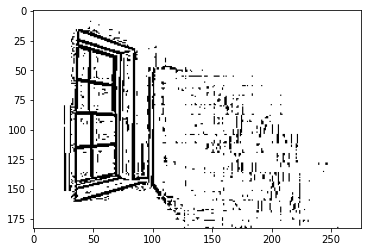

In [ ]:
plt.imshow(img_adpative_thresholding,cmap="gray")

In [ ]:
img_adpative_thresholding=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,6)

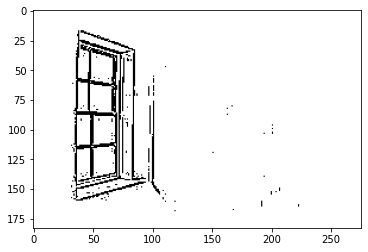

In [ ]:
plt.imshow(img_adpative_thresholding,cmap="gray")

In [ ]:
R,otsu_thresholding=cv2.threshold(gray,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)

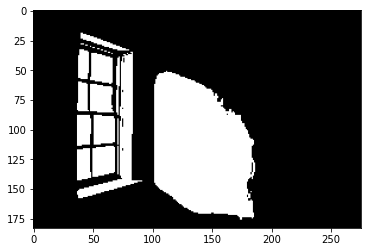

In [ ]:
plt.imshow(otsu_thresholding,cmap="gray")

In [ ]:
R

98.0

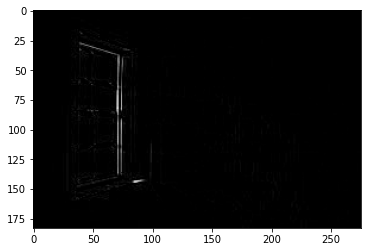

In [ ]:
filter_size=(3,3)
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,filter_size)
tophat=cv2.morphologyEx(gray,cv2.MORPH_TOPHAT,kernel)
plt.imshow(tophat,cmap="gray")

# 2.Binary image Hole fillings

In [ ]:
des = cv2.bitwise_not(gray)
contour,hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(des,[cnt],0,255,-1)

gray = cv2.bitwise_not(des)

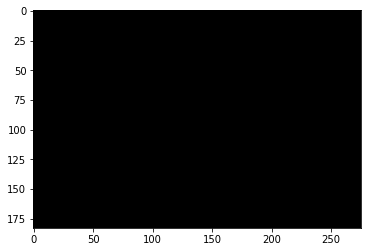

In [ ]:
plt.imshow(gray,cmap="gray")

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
res = cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel)

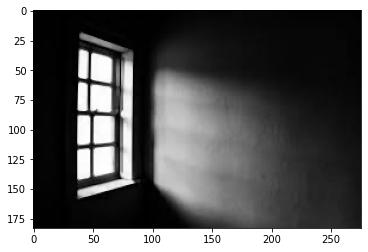

In [ ]:
plt.imshow(res,cmap="gray")

# 3.Connected components labelling (very important)

In [ ]:
num_labels, labels_im = cv2.connectedComponents(otsu_thresholding)

In [ ]:
np.max(labels_im)

24

In [ ]:
num_labels

25

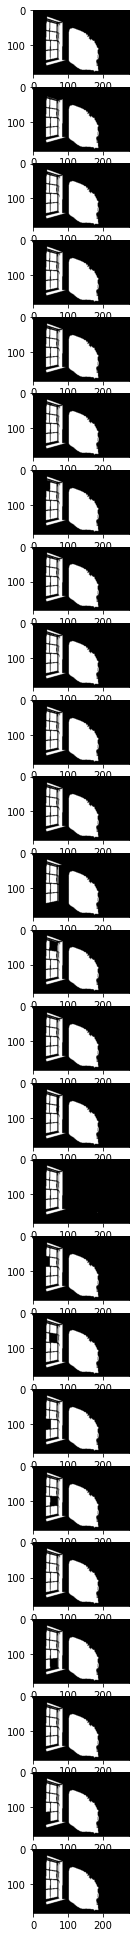

In [ ]:
plt.figure(figsize=(10,35))
for i in range(num_labels):
  plt.subplot(num_labels,1,i+1)
  sample_img=np.copy(otsu_thresholding)
  sample_img[labels_im==i]=0
  plt.imshow(sample_img,cmap="gray")

# 4. Distance transform

In [ ]:
from scipy import ndimage
distance_t=ndimage.distance_transform_edt(otsu_thresholding)

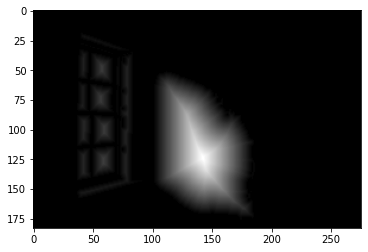

In [ ]:
plt.imshow(distance_t,cmap="gray")

# 5.Regionprops

In [ ]:
edged = cv2.Canny(gray, 30, 200)
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
img=np.copy(gray)

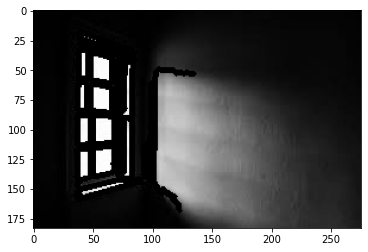

In [ ]:
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(img,cmap="gray")

In [ ]:
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
img=np.copy(gray)

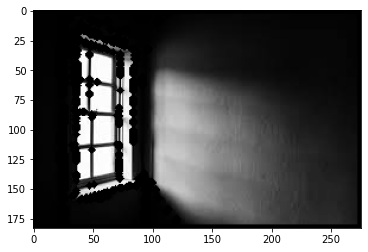

In [ ]:
plt.imshow(cv2.drawContours(img, contours, -1, (0,255,0), 3),cmap="gray")

In [ ]:
cnt = contours[0]
M = cv2.moments(cnt)
print( M )

{'m00': 49394.0, 'm10': 6853050.166666666, 'm01': 4512762.166666666, 'm20': 1259784792.8333333, 'm11': 624051026.1666666, 'm02': 547139648.1666666, 'm30': 260062876012.15002, 'm21': 114648016125.63333, 'm12': 75654285999.13333, 'm03': 74563256447.15001, 'mu20': 308975046.97654855, 'mu11': -2061163.9455336332, 'mu02': 134842155.09264904, 'mu30': -458875189.3635559, 'mu21': 122797852.17223358, 'mu12': 119355203.62957764, 'mu03': -63869440.15725708, 'nu20': 0.1266411985608567, 'nu11': -0.0008448199136049195, 'nu02': 0.05526845065503989, 'nu30': -0.0008462702682807186, 'nu21': 0.00022646718260411035, 'nu12': 0.0002201181553014347, 'nu03': -0.00011778978142572462}


In [ ]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [ ]:
cx,cy

(138, 91)

In [ ]:
area = cv2.contourArea(cnt)

In [ ]:
area

49394.0

In [ ]:
perimeter = cv2.arcLength(cnt,True)

In [ ]:
perimeter

1169.9411249160767

# 6. Finding object boundary

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/fDUGQ.jpg

--2022-02-20 17:31:59--  https://github.com/Dinesh-Adhithya-H/Computer-Vision/raw/main/fDUGQ.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/fDUGQ.jpg [following]
--2022-02-20 17:31:59--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Computer-Vision/main/fDUGQ.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11842 (12K) [image/jpeg]
Saving to: ‘fDUGQ.jpg’

fDUGQ.jpg           100%[===================>]  11.56K  --.-KB/s    in 0s      

2022-02-20 17:31:59 (90.0 MB/s) - ‘fDUGQ.jpg’ saved [11842/11842]



In [ ]:
coins=plt.imread("fDUGQ.jpg")

In [ ]:
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

In [ ]:
coins

array([[48, 48, 49, ..., 56, 55, 55],
       [48, 49, 49, ..., 57, 57, 56],
       [49, 49, 50, ..., 57, 57, 57],
       ...,
       [71, 71, 71, ..., 73, 71, 70],
       [71, 71, 71, ..., 72, 70, 69],
       [71, 71, 71, ..., 72, 70, 69]], dtype=uint8)

In [ ]:
ret, thresh = cv2.threshold(coins, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(coins, contours, -1, (0,255,0), 3)

array([[48, 48, 49, ..., 56, 55, 55],
       [48, 49, 49, ..., 57, 57, 56],
       [49, 49, 50, ..., 57, 57, 57],
       ...,
       [71, 71, 71, ..., 73, 71, 70],
       [71, 71, 71, ..., 72, 70, 69],
       [71, 71, 71, ..., 72, 70, 69]], dtype=uint8)

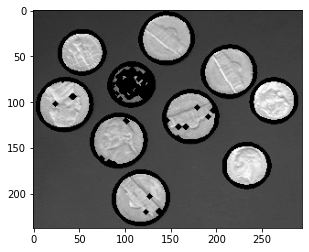

In [ ]:
plt.imshow(coins,cmap="gray")